In [18]:
library(TreePar)
library(TreeSim)
library(NELSI)
library(doParallel)
library(foreach)

In [41]:
set.seed(1234)
nspecies <- 100
time <- c(0, 0.5)
rho <- c(1, 0.5)
lambda <- c(1.5, 4)
mu <- c(1.5, 0)
rateshift_trees <- sim.rateshift.taxa(nspecies, 10, lambda = lambda, 
                                     mu = mu, frac = rho, times = time, complete = F)

 [1] 1.917881 1.398878 1.570691 1.558560 1.959879 1.577781 1.609623 1.797316
 [9] 1.567362 1.383617


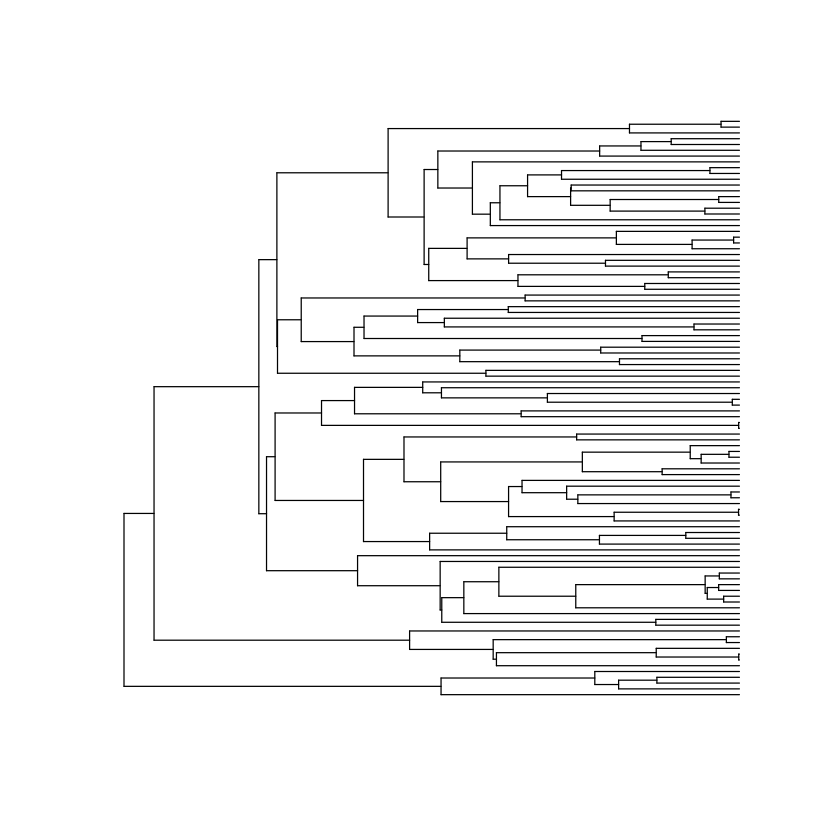

In [42]:
plot(rateshift_trees[[1]], show.tip.label = F)
#nodelabels(round(intnode.times(rateshift_trees[[1]]), 2))
print(  sapply(rateshift_trees, function(x) max(intnode.times(x)))  )

In [48]:
# Check that the rateshifts can be estimated
tr <- rateshift_trees[[1]]
x_times <- sort(intnode.times(tr), decreasing = T)
start <- min(x_times)
end <- max(x_times)
grid <- diff(range(x_times))/50
res <- bd.shifts.optim(x_times, sampling = c(1, 0.5), grid, start, end, posdiv = T)

[1] "startest"
[1] "test"
[1] 1.000000000 0.002032581
[1] 5.159337e+01 6.843247e-01 1.152531e-07 1.589644e+00 2.143368e+00
[6] 2.032581e-03
[1] 1.00000000 0.04034956
[1] 5.137300e+01 2.281417e-05 2.961471e-08 1.785183e+00 2.158900e+00
[6] 4.034956e-02
[1] 1.00000000 0.07866653
[1] 5.057525e+01 3.296405e-03 2.669657e-04 1.747890e+00 2.109499e+00
[6] 7.866653e-02
[1] 1.0000000 0.1169835
[1] 5.044154e+01 1.324138e-01 2.206014e-08 1.520416e+00 2.217915e+00
[6] 1.169835e-01
[1] 1.0000000 0.1553005
[1] 5.028957e+01 5.662508e-02 7.076169e-08 1.455986e+00 2.227397e+00
[6] 1.553005e-01
[1] 1.0000000 0.1936175
[1] 4.916581e+01 9.999368e-01 2.129434e-03 1.008312e-04 2.583190e+00
[6] 1.936175e-01
[1] 1.0000000 0.2319344
[1] 5.038402e+01 1.953930e-01 3.772966e-08 1.038165e+00 2.465496e+00
[6] 2.319344e-01
[1] 1.0000000 0.2702514
[1] 4.891554e+01 9.999354e-01 5.943934e-02 1.002152e-04 2.742123e+00
[6] 2.702514e-01
[1] 1.0000000 0.3085684
[1] 4.878400e+01 9.999330e-01 7.088802e-03 1.001261e-04 2.7819

In [49]:
res[[2]]

[[1]]
[1] 5.551192e+01 2.068049e-08 1.542809e+00

[[2]]
[1] 46.7574893  0.9076291  0.6570269  0.1404485  2.8984241  0.6534212

In [47]:
grid

[1] 0.02788637

In [59]:
fit_rate_shifts(rateshift_trees[[3]], rho)

[1] "startest"
[1] "test"
[1] 1.0000000000 0.0008629374
[1] 4.730247e+01 9.130950e-01 6.056168e-08 1.042916e+00 2.203851e+00
[6] 8.629374e-04
[1] 1.00000000 0.03225949
[1] 4.832538e+01 1.208042e-01 1.644053e-08 1.415720e+00 2.230535e+00
[6] 3.225949e-02
[1] 1.00000000 0.06365604
[1] 4.811778e+01 1.080546e-01 2.514325e-08 1.318028e+00 2.252113e+00
[6] 6.365604e-02
[1] 1.0000000 0.0950526
[1] 4.663805e+01 3.667049e-02 4.540873e-08 1.750490e+00 2.199525e+00
[6] 9.505260e-02
[1] 1.0000000 0.1264492
[1] 4.580633e+01 9.999463e-01 5.430016e-03 1.001744e-04 2.478477e+00
[6] 1.264492e-01
[1] 1.0000000 0.1578457
[1] 4.598992e+01 9.999387e-01 7.880421e-03 1.000548e-04 2.588761e+00
[6] 1.578457e-01
[1] 1.0000000 0.1892423
[1] 4.470110e+01 9.999481e-01 4.387957e-02 1.000547e-04 2.646471e+00
[6] 1.892423e-01
[1] 1.0000000 0.2206388
[1] 4.594721e+01 2.158034e-01 2.341820e-09 1.161612e+00 2.500963e+00
[6] 2.206388e-01
[1] 1.0000000 0.2520354
[1] 4.375565e+01 9.998103e-01 3.838131e-08 3.244406e-04 2.86

[[1]]
[1] 52.60606 39.50721

$shifts0
[1] 1.596512e+00 1.428766e-07

$shifts1
[1] 1.762796e+02 4.391086e+00 1.762680e+02 4.394416e-04 5.346043e-01

In [64]:
fit_rate_shifts <- function(tree, rho){ # Rho at present.

    x_times <- sort(intnode.times(tree), decreasing = T)
    start <- min(x_times)
    end <- max(x_times)
    grid <- diff(range(x_times))/50
    res <- bd.shifts.optim(x_times, rho, grid, start, end, posdiv = T)[[2]]

    # Find likelihoods, lambda, mu, and rate-shift times
    likelihoods <- sapply(res, function(x) x[1]) 
    
    lambda0 <- res[[1]][3] / (1 - res[[1]][2]) # These are the lambda and mu estimates from turover and net 
    mu0 <- lambda0 * res[[1]][2]               # speciation for 0 rate shifts. Please check.
   
    # The following are also computed, but note that some of them are negative and that this might. 
    # I couldn't simulate trees using these parameters, maybe because of the negative values?
    lambda11 <- res[[2]][3] / (1 - res[[2]][2])
    mu11 <- lambda11 * res[[2]][2]
    lambda12 <- res[[2]][5] / (1 - res[[2]][4])
    mu12 <- lambda12 * res[[2]][4]
    time1 <- res[[2]][length(res[[2]])]
    
    return(list(likelihoods, shifts0= c(lambda0, mu0), shifts1=c(lambda11, lambda12, mu11, mu12, time1)))
}

In [83]:
pvals <- vector()
likelihoods_distros <- list()
likelihoods_empirical <- vector()
empirical_tree_param_estimates <- list()

cl <- makeCluster(4)
registerDoParallel(cl)
for(tr in 1:3){   #length(rateshift_trees)){
#    x_times <- sort(intnode.times(rateshift_trees[[tr]]), decreasing = T)
#    start <- min(x_times)
#    end <- max(x_times)
#    grid <- diff(range(x_times))/50
    
    reference_estimates <- fit_rate_shifts(rateshift_trees[[tr]], rho)

    sim_trees0 <- sim.bd.taxa(n = nspecies, numbsim = 10, lambda = reference_estimates$shifts0[1], 
                              mu = reference_estimates$shifts0[2], frac = 0.5, complete = F)
    liks_sim_trees0 <- foreach(mt = sim_trees0, .packages = c('NELSI', 'TreePar')) %dopar% fit_rate_shifts(mt, rho)[[1]][1]
    likelihoods_distros[[tr]] <- liks_sim_trees0
    likelihoods_empirical[tr] <- reference_estimates[[1]][1]
    empirical_tree_param_estimates[[tr]] <- reference_estimates$shifts0
    pvals[tr] <- sum(reference_estimates[[1]][1] > liks_sim_trees0)

}
stopCluster(cl)

[1] "startest"
[1] "test"
[1] 1.000000000 0.002032581
[1] 5.159337e+01 6.843247e-01 1.152531e-07 1.589644e+00 2.143368e+00
[6] 2.032581e-03
[1] 1.00000000 0.04034956
[1] 5.137300e+01 2.281417e-05 2.961471e-08 1.785183e+00 2.158900e+00
[6] 4.034956e-02
[1] 1.00000000 0.07866653
[1] 5.057525e+01 3.296405e-03 2.669657e-04 1.747890e+00 2.109499e+00
[6] 7.866653e-02
[1] 1.0000000 0.1169835
[1] 5.044154e+01 1.324138e-01 2.206014e-08 1.520416e+00 2.217915e+00
[6] 1.169835e-01
[1] 1.0000000 0.1553005
[1] 5.028957e+01 5.662508e-02 7.076169e-08 1.455986e+00 2.227397e+00
[6] 1.553005e-01
[1] 1.0000000 0.1936175
[1] 4.916581e+01 9.999368e-01 2.129434e-03 1.008312e-04 2.583190e+00
[6] 1.936175e-01
[1] 1.0000000 0.2319344
[1] 5.038402e+01 1.953930e-01 3.772966e-08 1.038165e+00 2.465496e+00
[6] 2.319344e-01
[1] 1.0000000 0.2702514
[1] 4.891554e+01 9.999354e-01 5.943934e-02 1.002152e-04 2.742123e+00
[6] 2.702514e-01
[1] 1.0000000 0.3085684
[1] 4.878400e+01 9.999330e-01 7.088802e-03 1.001261e-04 2.7819

In [67]:
par(mfrow = c(3, 3))
for(i in 1:9){
    hist(as.numeric(likelihoods_distros[[i]]), main = '', ylab = '', xlab = '', col = rgb(0, 0, 0.5, 0.3))
    lines(x = c(likelihoods_empirical[i], likelihoods_empirical[i]), y = c(0, 20), col = 'red', lwd = 2)
}

ERROR: Error in likelihoods_distros[[i]]: subscript out of bounds


In [81]:
#liks_sim_trees0 <- foreach(mt = sim_trees0, .packages = c('NELSI', 'TreePar')) %do% fit_rate_shifts(mt, 1)[[1]][1]

fit_rate_shifts(mt, rho)

[1] "startest"
[1] "test"
[1] 1.000000000 0.000528079
[1] 6.730369e+01 9.829960e-01 1.732403e-07 3.220637e-01 1.842407e+00
[6] 5.280790e-04
[1] 1.00000000 0.06224522
[1] 69.37131145  0.11591262  0.08869822  0.88018008  1.81873773  0.06224522
[1] 1.0000000 0.1239624
[1] 6.941537e+01 2.959334e-06 1.164948e-01 1.023713e+00 1.824199e+00
[6] 1.239624e-01
[1] 1.0000000 0.1856795
[1] 6.924710e+01 3.013692e-06 2.723808e-01 9.368064e-01 1.730283e+00
[6] 1.856795e-01
[1] 1.0000000 0.2473967
[1] 6.938307e+01 2.250900e-06 3.037334e-01 9.955097e-01 1.718410e+00
[6] 2.473967e-01
[1] 1.0000000 0.3091138
[1] 6.713838e+01 9.998968e-01 6.515246e-01 1.007953e-04 1.515368e+00
[6] 3.091138e-01
[1] 1.0000000 0.3708309
[1] 68.676686478  0.001926329  0.551139037  0.986037141  1.473586232
[6]  0.370830946
[1] 1.0000000 0.4325481
[1] 6.843186e+01 5.790368e-07 6.164405e-01 1.001735e+00 1.389691e+00
[6] 4.325481e-01
[1] 1.0000000 0.4942652
[1] 6.888311e+01 3.248532e-07 6.389077e-01 1.076135e+00 1.330128e+00
[6] 4

[[1]]
[1] 71.02033 67.13838

$shifts0
[1] 1.316386e+00 1.692904e-06

$shifts1
[1] 6.314935e+03 1.515521e+00 6.314283e+03 1.527575e-04 3.091138e-01

In [82]:
liks_sim_trees0 <- foreach(mt = sim_trees0, .packages = c('NELSI', 'TreePar')) %do% fit_rate_shifts(mt, rho)[[1]][1]

[1] "startest"
[1] "test"
[1] 1.000000000 0.003995662
[1] 88.992223566  0.354280853  0.122728931  1.614694977  1.411340535
[6]  0.003995662
[1] 1.00000000 0.06460116
[1] 8.865847e+01 9.997848e-01 3.308520e-01 1.054137e-04 1.313826e+00
[6] 6.460116e-02
[1] 1.0000000 0.1252066
[1] 8.943221e+01 3.213448e-06 1.636357e-01 9.236637e-01 1.417120e+00
[6] 1.252066e-01
[1] 1.0000000 0.1858121
[1] 8.946352e+01 2.657262e-05 2.326755e-01 8.718216e-01 1.391341e+00
[6] 1.858121e-01
[1] 1.0000000 0.2464176
[1] 89.479394444  0.000251477  0.229209091  0.900514705  1.406463047
[6]  0.246417637
[1] 1.0000000 0.3070231
[1] 8.945075e+01 1.166436e-05 2.688743e-01 8.926795e-01 1.397355e+00
[6] 3.070231e-01
[1] 1.0000000 0.3676286
[1] 8.947186e+01 7.474188e-06 2.317219e-01 9.256594e-01 1.434427e+00
[6] 3.676286e-01
[1] 1.0000000 0.4282341
[1] 8.938088e+01 4.453995e-04 3.102104e-01 9.020636e-01 1.400137e+00
[6] 4.282341e-01
[1] 1.0000000 0.4888396
[1] 8.939360e+01 6.719444e-06 3.293954e-01 9.124813e-01 1.396722

In [100]:
# First we simulate a tree, and then estimate the parameters for the tree:
# Number of species
nspecies <- 20
# At time 1 and 2 in the past, we have a rate shift:
time <- c(0,1)
# Mass extinction intensities 0.5 at time 1 in past, 0.4 at time 2 in past. 
# Present day species are all sampled (rho[1]=1):
rho <- c(1,0.5)
# speciation rates (between t[i],t[i+1] we have speciation rate lambda[i]):
lambda <- c(2,2)
# extinction rates (between t[i],t[i+1] we have extinction rate mu[i]):
mu <- c(1,1,0)
# Simulation of a tree:
tree<-sim.rateshift.taxa(nspecies,1,lambda,mu,frac=rho,times=time,complete=FALSE)
# Extracting the speciation times x:
x<-sort(getx(tree[[1]]),decreasing=TRUE)

# When estimating the the rate shift times t based on branching times x, 
# we allow the shift times to be 0.6, 0.8, 1, 1.2, .. ,2.4:
start <- 0.6
end <- 2.4
grid <- 0.2


# We fix rho and estimate time, lambda, mu:
res <- bd.shifts.optim(x,rho,grid,start,end)[[2]]
res
# res[[2]] tells us about the maximum likelihood estimate given one rate shift:
# - log lik = 17.330862988.
# rate shift at time 2.2.
# turnover (extinction/speciation) = 0.186301549 more recent than 2.2,
#     and = 0.939681843 more ancestral than 2.2.
# net diversification (speciation-extinction) rate = 0.958947381 more recent than 2.2, 
#     and = 0.000100009 more ancestral than 2.2.


[1] "startest"
[1] "test"
[1] 1.0 0.6
[1]  7.8478260  0.2298281  1.0996207  1.6981402 -0.4711866  0.6000000
[1] 1.0 0.8
[1] 6.327767e+00 2.271186e-05 9.350212e-09 2.128287e+00 5.827547e-01
[6] 8.000000e-01
[1] 1 1
[1] 7.297675e+00 2.999158e-01 2.635424e-07 1.591399e+00 8.843404e-01
[6] 1.000000e+00
[1] 1.0 1.2
[1] 7.961084e+00 5.720114e-01 1.096259e-06 1.071300e+00 1.464171e+00
[6] 1.200000e+00
[1] 1.0 1.4
[1]  8.2546664  0.7628175  1.1553556  0.6436454 -1.0296857  1.4000000
[1] 1.0 1.6
[1]  7.87790342  0.93542117  1.00121297  0.19978547 -0.03148909  1.60000000
[1] 1.0 1.8
[1] 8.0170061287 0.7370273028 0.0384017911 0.7043154492 0.0001008609
[6] 1.8000000000
[1] 1 2
[1] 8.2903984 0.7996773 0.8264999 0.5543738 0.5799911 2.0000000
[1] 1.0 2.2
[1] 8.2903984 0.7996773 0.8264999 0.5543738 0.5799911 2.2000000
[1] 1.0 2.4
[1] 8.2903984 0.7996773 0.8264999 0.5543738 0.5799911 2.4000000
[[1]]
[1] 8.2903985 0.8000117 0.5535029

[[2]]
[1] 6.327767e+00 2.271186e-05 9.350212e-09 2.128287e+00 5.82754

[[1]]
[1] 8.2903985 0.8000117 0.5535029

[[2]]
[1] 6.327767e+00 2.271186e-05 9.350212e-09 2.128287e+00 5.827547e-01
[6] 8.000000e-01

[[3]]
[1] 4.842006e+00 1.474012e-01 8.895358e-08 9.345340e-01 1.892561e+00
[6] 1.000109e-04 8.383637e-01 8.000000e-01 1.600000e+00